In [1]:
import wfdb
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import h5py
from mne.filter import filter_data
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN, KMeans
from mne.filter import filter_data, notch_filter
from sklearn.calibration import calibration_curve
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, roc_curve, auc, recall_score, precision_score, f1_score, confusion_matrix


all_data_path = r"E:\a天理本人相关\智慧医疗\PAF\coding\lj\all_data"
small_data_path = r"E:\a天理本人相关\智慧医疗\PAF\coding\lj\data"

# file_path = "Net1d_newGroup\PAF_net1d_Group2\list_data.h5"
# file_path = "Net1d_Split\PAF_net1d_Split1_5\list_data.h5"
firstNum = 67
file_path = f"Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-{firstNum}/list_data{firstNum}.h5"
file_paths = ["Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-16\list_data16.h5", "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-17\list_data17.h5", "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-43\list_data43.h5", "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-67\list_data67.h5", "Net1d_Split1_denoise\PAF_net1d_SplitDenoise_FirstNum-103\list_data103.h5"]

hf_keys = []
data = {}
for file_path in file_paths:
    with h5py.File(file_path, 'r') as hf:
        for key in hf.keys():
            hf_keys.append(key)
            data[key] = hf[key][:]
print(hf_keys)
print(len(hf_keys))


people_info = pd.read_csv(r"E:\a天理本人相关\智慧医疗\PAF\coding\data_distil\people_info.csv")
key_value = people_info.set_index('Key').to_dict()['Value']
print(key_value)

d:\Anaconda\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
d:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\Anaconda\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


['data_12_1', 'data_12_2', 'data_12_3', 'data_12_4', 'data_12_5', 'data_12_6', 'data_12_7', 'data_12_8', 'data_16_1', 'data_16_2', 'data_16_3', 'data_16_4', 'data_22_1', 'data_22_10', 'data_22_11', 'data_22_12', 'data_22_13', 'data_22_14', 'data_22_15', 'data_22_16', 'data_22_2', 'data_22_3', 'data_22_4', 'data_22_5', 'data_22_6', 'data_22_7', 'data_22_8', 'data_22_9', 'data_26_1', 'data_26_10', 'data_26_11', 'data_26_12', 'data_26_13', 'data_26_2', 'data_26_3', 'data_26_4', 'data_26_5', 'data_26_6', 'data_26_7', 'data_26_8', 'data_26_9', 'data_36_1', 'data_36_2', 'data_36_3', 'data_36_4', 'data_36_5', 'data_36_6', 'data_36_7', 'data_36_8', 'data_40_1', 'data_40_2', 'data_40_3', 'data_40_4', 'data_40_5', 'data_41_1', 'data_41_10', 'data_41_11', 'data_41_12', 'data_41_13', 'data_41_14', 'data_41_2', 'data_41_3', 'data_41_4', 'data_41_5', 'data_41_6', 'data_41_7', 'data_41_8', 'data_41_9', 'data_45_1', 'data_45_10', 'data_45_2', 'data_45_3', 'data_45_4', 'data_45_5', 'data_45_6', 'data_4

In [4]:
# beat_info = r"E:\a天理本人相关\智慧医疗\PAF\coding\data_distil\people_BeatInfo.csv"
# beat_info = pd.read_csv(beat_info)
# beat_info = beat_info.set_index('Id').to_dict()['DataNum']
# target = 'data_25_1'
# # target = 'data_88_1'
# first_num = target.split('_')[1]
# for i in range(1, 1+beat_info[int(first_num)]):
#     file_name = 'data' + '_' + str(first_num) + '_' + str(i)
#     annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
#     R_location = annotation.sample
#     R_symbol = annotation.symbol
#     AF_location = []
#     for j in range(len(R_symbol)):
#         if R_symbol[j] != 'N':
#             AF_location.append(j+1)
#     print(f"{i}:", AF_location)
#     # print(data[target].shape)
#     # print(key_value[int(target.split('_')[1])])

1: [1, 5935, 6007, 11636, 12735, 12999, 14173, 14387, 14396, 14487, 14504, 14509, 14513, 14568, 14579, 14665, 14768, 14813, 14845, 14879, 14982, 14998, 15349, 15482, 16151, 16181, 16185, 16410, 16465, 16597, 16655, 16668, 16676, 16778, 16853, 16863, 16901, 16912, 16928, 16935, 16944, 16960, 16968, 16976, 16993, 16998, 17003, 17024, 17054, 17108, 17113, 17119, 17125, 17158, 17211, 17253, 17304, 17348, 17353, 17424, 17431, 17451, 17458, 17551, 17562, 17584, 17716, 18033, 18158, 18164, 18169, 18192, 18196, 18199, 18213, 18218, 18224, 18228, 18232, 18240, 18243, 18247, 18254, 18259, 18266, 18270, 18275, 18298, 18315, 18334, 18347, 18381, 18383, 18391, 18393, 18395, 18397, 18399, 18405, 18439, 18464, 18468, 18473, 18476, 18478, 18483, 18488, 18491, 18494, 18496, 18499, 18504, 18532, 18534, 18535, 18545, 18549, 18566, 18573, 18575, 18580, 18584, 18588, 18591, 18594, 18597, 18601, 18603, 18613, 18616, 18621, 18625, 18630, 18635, 18638, 18643, 18647, 18648, 18670, 18688, 18692, 18698, 18702, 1

In [5]:
# target = 'data_48_6'
# file_name = target
# record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
# sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
# label = key_value[int(target.split('_')[1])]

# annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
# R_location = annotation.sample
# R_symbol = annotation.symbol
# p_signal = record.p_signal[:, 0]
# p_signal = p_signal.flatten()

# AF_location = []
# for i in range(len(R_symbol)):
#     if R_symbol[i] == 'V':
#         AF_location.append(i+1)

# # 获得概率值
# seg_data = data[target]
# # print(seg_data.shape)
# seg_pro = []
# for i in range(len(seg_data)):
#     seg_pro.append(seg_data[i][-2])

# start = 200
# end = 220
# print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
# print("AF_location: ", AF_location) # 标签为"V"的位置
# print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
# print("R_symbol: ", R_symbol[start:end])  # R峰标签
# print()

# start_p_signal = R_location[start]
# end_p_signal = R_location[end]
# plt.figure(figsize=(20, 5))
# plt.xlim(start_p_signal-100, end_p_signal+100)
# plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal])
# plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')


# 所有心电数据的统计

In [6]:
# def get_signal(name, data_path):
#     sig, fields = wfdb.rdsamp(os.path.join(data_path, name))
#     record = wfdb.rdrecord(os.path.join(data_path, name))
#     sig = sig.flatten()
#     # sig = self.denoise(sig)  # 滤波操作

#     # 'non atrial fibrillation', 'persistent atrial fibrillation', 'paroxysmal atrial fibrillation'
#     # if fields['comments'][0] == 'non atrial fibrillation':
#     #     label = 0
#     # elif fields['comments'][0] == 'persistent atrial fibrillation':
#     #     label = 1
#     # else:
#     #     label = 1 # 暂时先二分类
#     name_key = int(name.split('_')[1])
#     label = key_value[name_key]

#     annotation = wfdb.rdann(os.path.join(data_path, name), 'atr')
#     R_location = annotation.sample
#     R_class = annotation.symbol

#     all_segments = []
#     all_labels = []


#     start = 5
#     end = len(R_location) - 5
#     i = start
#     j = end
#     p_signal = record.p_signal[:, 0]
#     p_signal = p_signal.flatten()

#     # 滤波操作
#     sfreq = 200
#     low_freq = 0.5
#     high_freq = 50.0
#     p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)


#     """
#     一个beat对应一个标签
#     """
#     while i < j:
#         if R_class[i] == 'N':
#             left = R_location[i] - 200 // 2
#             right = R_location[i] + 200 // 2
#             sub_sig = p_signal[left:right]
#             all_segments.append(sub_sig)
#             if label == 0:
#                 all_labels.append(0)
#             else:
#                 all_labels.append(1)
#         i += 1

#     _x = all_segments
#     _y = all_labels

#     return _x, _y


# alldata_data, alldata_labels =  [], []
# name_list = []
# for file_name in os.listdir(all_data_path):
#     name_list.append(file_name.split('.')[0])
# for name in name_list:
#     result = get_signal(name, all_data_path)
#     _x = []
#     _y = []
#     if result is not None:
#         _x, _y = result
#     if len(_x) == 0:
#         continue
#     else:
#         _x = np.array(_x)
#         _y = np.array(_y)
#         alldata_data.extend(_x)
#         alldata_labels.extend(_y)

# 对所有数据进行统计，查看对应beat的标签是否正确

In [7]:
# name_list = []
# for file_name in os.listdir(all_data_path):
#     name_list.append(file_name.split('.')[0])
# name_list = list(set(sorted(name_list)))
# print(len(name_list))
# for target in name_list[:]:
#     file_name = target
#     record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
#     sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
#     label = key_value[int(target.split('_')[1])]
#     if label == 0:
#         continue

#     annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
#     R_location = annotation.sample
#     R_symbol = annotation.symbol
#     p_signal = record.p_signal[:, 0]
#     p_signal = p_signal.flatten()
    
#     # 滤波操作
#     sfreq = 200
#     low_freq = 0.5
#     high_freq = 50.0
#     p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)

#     AF_location = []
#     for i in range(len(R_symbol)):
#         if R_symbol[i] != 'N':
#             AF_location.append(i+1)

#     # # 获得概率值
#     # seg_data = data[target]
#     # seg_pro = []
#     # for i in range(len(seg_data)):
#     #     seg_pro.append(round(seg_data[i][-2], 2))

#     start = 10
#     end = 30
#     # print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
#     # print("AF_location: ", AF_location) # 标签为"V"的位置
#     # print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
#     # print("R_symbol: ", R_symbol[start:end])  # R峰标签
#     # print()
#     if len(R_location) < end + 1:
#         continue
    
#     start_p_signal = R_location[start]
#     end_p_signal = R_location[end]
#     plt.figure(figsize=(20, 5))
#     # plt.xlim(start_p_signal-100, end_p_signal+100)
#     plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal])

#     # 标记R_symbol
#     index_list = [i for i in range(start, end+1)]
#     for i in index_list:
#         symbol = R_symbol[i]
#         mid_idx = R_location[i]
#         plt.text(mid_idx, p_signal[mid_idx], symbol, fontsize=20, color='r', ha='center', va='center')
#     # plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')
#     # plt.title(target)
#     plt.tight_layout()
#     if not os.path.exists("DenoiseResultBadReason"):
#         os.makedirs("DenoiseResultBadReason")
#     plt.savefig(f"DenoiseResultBadReason/Origin/{target}---{start}_{end}.png")
#     # plt.close()

## 对所有数据进行聚类

In [8]:
# # 6114900
# interval = 100000
# start = 0
# ends = start + interval
# label0 = 0
# label1 = 0
# while ends < 6100000:
#     x = alldata_data[start:ends]
#     x = np.array(x)
#     # 使用 PCA 将数据降到二维
#     pca = PCA(n_components=2)
#     x_pca = pca.fit_transform(x)

#     # 使用 KMeans 聚类算法将降维后的数据分为 2 类
#     kmeans = KMeans(n_clusters=2)
#     labels = kmeans.fit_predict(x_pca)

#     # 统计每一类的数据量
#     unique_labels, counts = np.unique(labels, return_counts=True)
#     for label, count in zip(unique_labels, counts):
#         print(f"类别 {label}: {count} 个样本", end='  ')
#         if label == 0:
#             label0 += count
#         else:
#             label1 += count
#     print()
#     start += interval
#     ends += interval
# print(label0, label1)
# # # 将聚类结果可视化
# # plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis')
# # plt.title('KMeans Clustering with PCA')
# # plt.show()

## 个别人的心电图图像

In [9]:
# target = 'data_48_6'
people_num = 1
seg_num = [i for i in range(1, 2)]
targets = [f"data_{people_num}_{i}" for i in seg_num]
# targets = ['data_48_20', 'data_48_21', 'data_48_22', 'data_48_23', 'data_48_24', 'data_48_11', 'data_48_12']
for target in targets[:1]:
    file_name = target
    record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
    sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
    label = key_value[int(target.split('_')[1])]

    annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
    R_location = annotation.sample
    R_symbol = annotation.symbol
    p_signal = record.p_signal[:, 0]
    p_signal = p_signal.flatten()

    # 滤波操作
    sfreq = 200
    low_freq = 0.5
    high_freq = 50.0
    p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)

    # 获得概率值
    seg_data = data[target]
    # print(seg_data.shape)
    seg_pro = []
    for i in range(len(seg_data)):
        seg_pro.append(round(seg_data[i][-2], 2))
    
    # AF_location = []
    # for i in range(len(R_symbol))[10:-5]:
    #     if R_symbol[i] != 'N':
    #         AF_location.append(i+1)

    # 概率变化情况，因只统计了N，所以要将我们的start和end转换为N的start和end
    all_seg_pro = [0 for i in range(10)]
    index = 0
    # print("len(R_symbol): ", len(R_symbol)-15)
    # print("len(seg_pro): ", len(seg_pro))
    # print("len(Af_location): ", len(AF_location))
    for i in range(len(R_symbol))[10:-5]:
        if R_symbol[i] == 'N':
            all_seg_pro.append(seg_pro[index])
            index += 1
        else:
            all_seg_pro.append('...')
    # print("index: ", index)

    
    # start最好从 10 开始
    start = 20
    # end = 120
    while start < len(R_location) - 5 and start + 20 < len(R_location) - 5:
        end = start + 20
        # print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
        # print("AF_location: ", AF_location) # 标签为非"N"的位置
        # print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
        # print("R_symbol: ", R_symbol[start:end])  # R峰标签
        # print("all_seg_pro: ", all_seg_pro[start:end])
        # print()

        start_p_signal = R_location[start]
        end_p_signal = R_location[end]
        plt.figure(figsize=(20, 5))
        # plt.xlim(start_p_signal-100, end_p_signal+100)
        plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal])
        plt.ylim(0, 1)

        # 标记R_symbol
        index_list = [i for i in range(start, end+1)]
        for i in index_list:
            symbol = R_symbol[i]
            proba = all_seg_pro[i]
            mid_idx = R_location[i]
            plt.text(mid_idx, p_signal[mid_idx], symbol, fontsize=20, color='r', ha='center', va='center')
            plt.text(mid_idx, p_signal[mid_idx] * 1.02, proba, fontsize=20, color='r', ha='center', va='center')
        # plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')
        plt.title(f"{target}---{start}_{end}")
        plt.tight_layout()
        if not os.path.exists("DenoiseResultProVariation"):
            os.makedirs("DenoiseResultProVariation")
        plt.savefig(f"DenoiseResultProVariation/{target}---{start}_{end}.png")
        plt.close()
        start += 20

KeyError: 'data_1_1'

## 根据概率画折线图

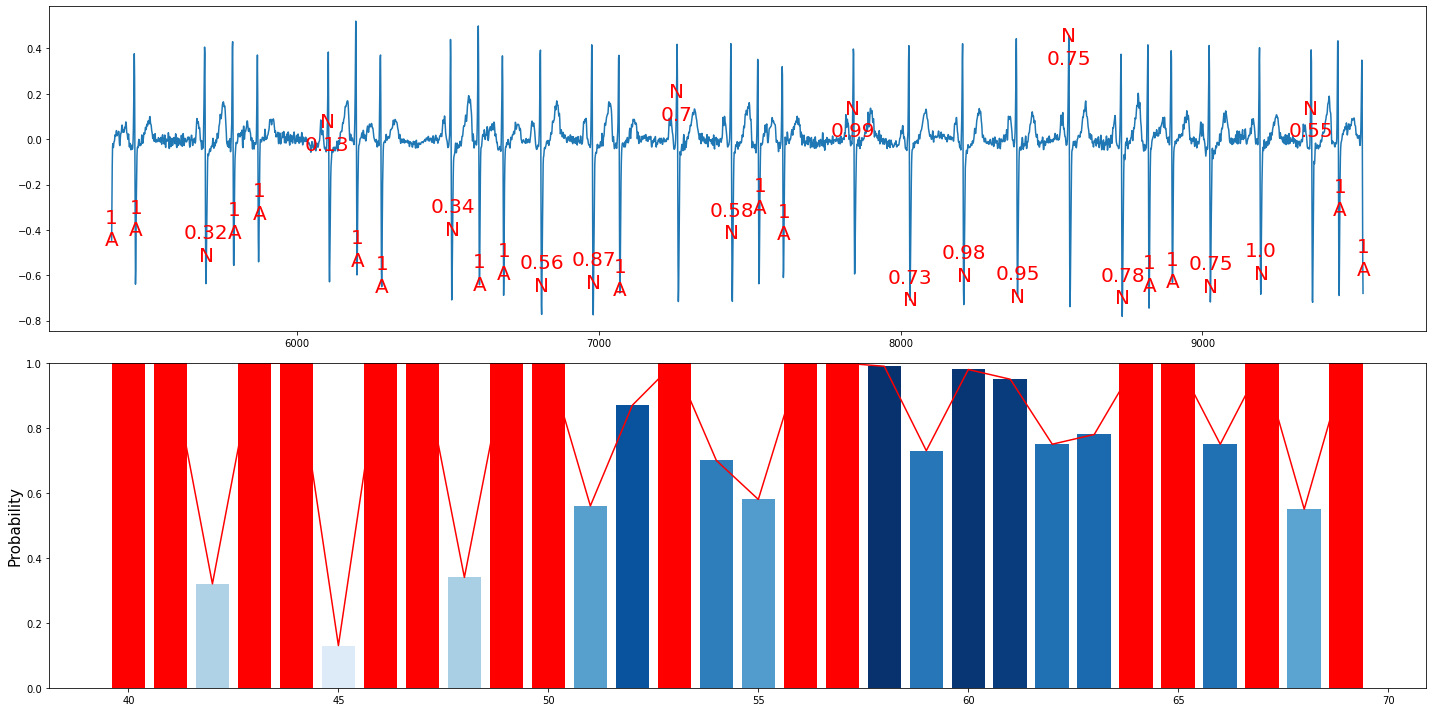

In [4]:
# target = 'data_48_6'
people_num = 61
seg_num = [i for i in range(1, 8)]
targets = [f"data_{people_num}_{i}" for i in seg_num]
targets = ["data_25_18"]
# targets = ['data_48_20', 'data_48_21', 'data_48_22', 'data_48_23', 'data_48_24', 'data_48_11', 'data_48_12']
for target in targets[:1]:
    file_name = target
    record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
    sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
    label = key_value[int(target.split('_')[1])]

    annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
    R_location = annotation.sample
    R_symbol = annotation.symbol
    p_signal = record.p_signal[:, 0]
    p_signal = p_signal.flatten()

    # 滤波操作
    sfreq = 200
    low_freq = 0.5
    high_freq = 50.0
    p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)

    # 获得概率值
    seg_data = data[target]
    # print(seg_data.shape)
    seg_pro = []
    for i in range(len(seg_data)):
        seg_pro.append(round(seg_data[i][-2], 2))
    
    # AF_location = []
    # for i in range(len(R_symbol))[10:-5]:
    #     if R_symbol[i] != 'N':
    #         AF_location.append(i+1)

    # 概率变化情况，因只统计了N，所以要将我们的start和end转换为N的start和end
    all_seg_pro = [0 for i in range(10)]
    index = 0
    # print("len(R_symbol): ", len(R_symbol)-15)
    # print("len(seg_pro): ", len(seg_pro))
    # print("len(Af_location): ", len(AF_location))
    for i in range(len(R_symbol))[10:-5]:
        if R_symbol[i] == 'N':
            all_seg_pro.append(seg_pro[index])
            index += 1
        else:
            all_seg_pro.append(1)
    # print("index: ", index)

    
    # start最好从 10 开始
    start = 40
    end = start + 20
    # print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
    # print("AF_location: ", AF_location) # 标签为非"N"的位置
    # print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
    # print("R_symbol: ", R_symbol[start:end])  # R峰标签
    # print("all_seg_pro: ", all_seg_pro[start:end])
    # print()

    start_p_signal = R_location[start]
    end_p_signal = R_location[end]
    plt.figure(figsize=(20, 10))
    plt.subplot(211)
    # plt.xlim(start_p_signal-100, end_p_signal+100)
    plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal])

    # 标记R_symbol
    index_list = [i for i in range(start, end+1)]
    for i in index_list:
        symbol = R_symbol[i]
        proba = all_seg_pro[i]
        mid_idx = R_location[i]
        plt.text(mid_idx, p_signal[mid_idx], symbol, fontsize=20, color='r', ha='center', va='center')
        proba_loc = 0
        if p_signal[mid_idx] > 0 :
            proba_loc = p_signal[mid_idx] - 0.1
        else:
            proba_loc = p_signal[mid_idx] + 0.1
        plt.text(mid_idx, proba_loc, proba, fontsize=20, color='r', ha='center', va='center')
    # plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')
    # plt.title(f"{target}---{start}_{end}", fontsize=15)
    
    plt.subplot(212)
    plt.plot(range(start, end), all_seg_pro[start:end], c='red')

    # Normalize the values
    norm = plt.Normalize(0, 1)
    norm_values = norm(all_seg_pro[start:end])

    # Choose a colormap
    map_vir = cm.get_cmap(name='Blues')

    # Assign colors based on values
    colors = map_vir(norm_values)
    # Find indices where all_seg_pro is equal to 1

    indices_to_change = np.where(np.array(all_seg_pro[start:end]) == 1)[0]
    # Change the color of bars with all_seg_pro == 1 to red
    for index in indices_to_change:
        colors[index] = [1, 0, 0, 1]  # RGBA format for red

    # Create the bar chart
    plt.bar(range(start, end), all_seg_pro[start:end], color=colors, label='Bar Chart')

    # Add colorbar
    sm = cm.ScalarMappable(cmap=map_vir, norm=norm)
    sm.set_array([])
    # plt.colorbar(sm)
    plt.ylabel('Probability', fontsize=15)
    plt.ylim(0, 1)

    plt.tight_layout()
    if not os.path.exists("DenoiseResultProVariation"):
        os.makedirs("DenoiseResultProVariation")
    plt.savefig(f"DenoiseResultProVariation/{target}---{start}_{end}.png")
    # plt.close()

In [13]:
# 大批量的观察

# target = 'data_48_6'
people_num = 0
seg_num = [i for i in range(1, 10)]
targets = [f"data_{people_num}_{i}" for i in seg_num]
targets = ["data_61_1"]
# targets = ['data_48_20', 'data_48_21', 'data_48_22', 'data_48_23', 'data_48_24', 'data_48_11', 'data_48_12']
for target in targets[:]:
    file_name = target
    record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
    sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
    label = key_value[int(target.split('_')[1])]

    annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
    R_location = annotation.sample
    R_symbol = annotation.symbol
    p_signal = record.p_signal[:, 0]
    p_signal = p_signal.flatten()

    # 滤波操作
    sfreq = 200
    low_freq = 0.5
    high_freq = 50.0
    p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)

    # 获得概率值
    seg_data = data[target]
    # print(seg_data.shape)
    seg_pro = []
    for i in range(len(seg_data)):
        seg_pro.append(round(seg_data[i][-2], 2))
    
    # AF_location = []
    # for i in range(len(R_symbol))[10:-5]:
    #     if R_symbol[i] != 'N':
    #         AF_location.append(i+1)

    # 概率变化情况，因只统计了N，所以要将我们的start和end转换为N的start和end
    all_seg_pro = [0 for i in range(10)]
    index = 0
    # print("len(R_symbol): ", len(R_symbol)-15)
    # print("len(seg_pro): ", len(seg_pro))
    # print("len(Af_location): ", len(AF_location))
    for i in range(len(R_symbol))[10:-5]:
        if R_symbol[i] == 'N':
            all_seg_pro.append(seg_pro[index])
            index += 1
        else:
            all_seg_pro.append(1)
    # print("index: ", index)
    # print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
    # print("AF_location: ", AF_location) # 标签为非"N"的位置
    # print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
    # print("R_symbol: ", R_symbol[start:end])  # R峰标签
    # print("all_seg_pro: ", all_seg_pro[start:end])
    # print()

    # start最好从 10 开始
    start = 20
    while start < len(R_location) - 5 and start + 20 < len(R_location) - 5:
        end = start + 20

        start_p_signal = R_location[start]
        end_p_signal = R_location[end]
        plt.figure(figsize=(20, 10))
        plt.subplot(211)
        # plt.xlim(start_p_signal-100, end_p_signal+100)
        plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal])

        # 标记R_symbol
        index_list = [i for i in range(start, end+1)]
        for i in index_list:
            symbol = R_symbol[i]
            proba = all_seg_pro[i]
            mid_idx = R_location[i]
            plt.text(mid_idx, p_signal[mid_idx], symbol, fontsize=20, color='r', ha='center', va='center')
            plt.text(mid_idx, p_signal[mid_idx] - 0.2, proba, fontsize=20, color='r', ha='center', va='center')
        # plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')
        plt.title(f"{target}---{start}_{end}", fontsize=15)
        
        plt.subplot(212)
        plt.plot(range(start, end), all_seg_pro[start:end], c='red')

        # Normalize the values
        norm = plt.Normalize(0, 1)
        norm_values = norm(all_seg_pro[start:end])

        # Choose a colormap
        map_vir = cm.get_cmap(name='Blues')

        # Assign colors based on values
        colors = map_vir(norm_values)
        # Find indices where all_seg_pro is equal to 1

        indices_to_change = np.where(np.array(all_seg_pro[start:end]) == 1)[0]
        # Change the color of bars with all_seg_pro == 1 to red
        for index in indices_to_change:
            colors[index] = [1, 0, 0, 1]  # RGBA format for red

        # Create the bar chart
        plt.bar(range(start, end), all_seg_pro[start:end], color=colors, label='Bar Chart')

        # Add colorbar
        sm = cm.ScalarMappable(cmap=map_vir, norm=norm)
        sm.set_array([])
        plt.ylim(0, 1)
        # plt.colorbar(sm)
        plt.ylabel('Probability', fontsize=15)

        plt.tight_layout()
        if not os.path.exists("DenoiseResultProVariation/Origin"):
            os.makedirs("DenoiseResultProVariation/Origin")
        plt.savefig(f"DenoiseResultProVariation/Origin/{target}---{start}_{end}.png")
        plt.close()
        start += 20

# 每个人的片段beat带标签，以及无beat标签

In [11]:
# target = 'data_48_6'
people_num = 61
# seg_num = [i for i in range(1, 2)]
# targets = [f"data_{people_num}_{i}" for i in seg_num]
targets = ["data_8_1"]
# targets = ['data_48_20', 'data_48_21', 'data_48_22', 'data_48_23', 'data_48_24', 'data_48_11', 'data_48_12']
for target in targets[:1]:
    file_name = target
    record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
    sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
    label = key_value[int(target.split('_')[1])]

    annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
    R_location = annotation.sample
    R_symbol = annotation.symbol
    p_signal = record.p_signal[:, 0]
    p_signal = p_signal.flatten()

    # 滤波操作
    sfreq = 200
    low_freq = 0.5
    high_freq = 50.0
    p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)

    # # 获得概率值
    # seg_data = data[target]
    # # print(seg_data.shape)
    # seg_pro = []
    # for i in range(len(seg_data)):
    #     seg_pro.append(round(seg_data[i][-2], 2))
    
    # # AF_location = []
    # # for i in range(len(R_symbol))[10:-5]:
    # #     if R_symbol[i] != 'N':
    # #         AF_location.append(i+1)

    # # 概率变化情况，因只统计了N，所以要将我们的start和end转换为N的start和end
    # all_seg_pro = [0 for i in range(10)]
    # index = 0
    # # print("len(R_symbol): ", len(R_symbol)-15)
    # # print("len(seg_pro): ", len(seg_pro))
    # # print("len(Af_location): ", len(AF_location))
    # for i in range(len(R_symbol))[10:-5]:
    #     if R_symbol[i] == 'N':
    #         all_seg_pro.append(seg_pro[index])
    #         index += 1
    #     else:
    #         all_seg_pro.append('...')
    # # print("index: ", index)

    
    # start最好从 10 开始
    start = 10
    # end = 120
    while start < len(R_location) - 5 and start + 20 < len(R_location) - 5:
        end = start + 15
        # print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
        # print("AF_location: ", AF_location) # 标签为非"N"的位置
        # print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
        # print("R_symbol: ", R_symbol[start:end])  # R峰标签
        # print("all_seg_pro: ", all_seg_pro[start:end])
        # print()

        start_p_signal = R_location[start]
        end_p_signal = R_location[end]
        plt.figure(figsize=(15, 5))
        # plt.xlim(start_p_signal-100, end_p_signal+100)
        plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal], c='black')

        # 标记R_symbol
        index_list = [i for i in range(start, end+1)]
        # for i in index_list:
        #     symbol = R_symbol[i]
        #     proba = all_seg_pro[i]
        #     mid_idx = R_location[i]
        #     plt.text(mid_idx, p_signal[mid_idx], symbol, fontsize=20, color='r', ha='center', va='center')
            # plt.text(mid_idx, p_signal[mid_idx] * 1.02, proba, fontsize=20, color='r', ha='center', va='center')
        # plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')
        # plt.title(f"{target}---{start}_{end}")
        plt.tight_layout()
        if not os.path.exists("DenoiseResultBeatImage"):
            os.makedirs("DenoiseResultBeatImage")
        plt.savefig(f"DenoiseResultBeatImage/{target}---{start}_{end}.png")
        plt.close()
        start += 15

# 查看房颤患者的情况，用（AFIB 和 （N 标记房颤片段

In [2]:
def afDurationCreate(aux, afDuration):
    seg = []
    for i in range(len(aux)):
        if aux[i] == '(AFIB' or aux[i] == 'AFL':
            if len(seg) == 0:
                seg.append(i)
            else:
                continue
        elif aux[i] == '(N':
            if len(seg) != 0:
                seg.append(i)
            else:
                seg.append(i)
                seg.append(i)
            # seg.append(i)
        if i == len(aux) - 1 and len(seg) == 1:
            seg.append(i)
        if len(seg) == 2:
            afDuration.append(seg)
            seg = []
    if len(afDuration) == 0:
        afDuration.append([0, 0])
def checkInAf(x, afDuration):
    # print(afDuration)
    try:
        for temp in afDuration:
            s, e = temp[0], temp[1]
            if x >= s and x < e:
                return True
        return False
    except:
        print(afDuration)
        print(x)

# targets = ['data_48_6']
# len(hf_keys): 1435
testSet = [4, 11, 17, 18, 29, 30, 31, 37, 48, 75, 77, 83, 84, 86, 88, 93, 95, 97, 100, 102, 104]
for target in hf_keys[:]:
    if int(target.split('_')[1]) not in testSet:
        continue
    file_name = target
    record = wfdb.rdrecord(os.path.join(all_data_path, file_name))
    sig, fields = wfdb.rdsamp(os.path.join(all_data_path, file_name))
    label = key_value[int(target.split('_')[1])]
    if label == 0:
        continue

    annotation = wfdb.rdann(os.path.join(all_data_path, file_name), 'atr')
    R_location = annotation.sample
    R_symbol = annotation.symbol
    aux = annotation.aux_note
    p_signal = record.p_signal[:, 0]
    p_signal = p_signal.flatten()
    # print("R_symbol: ", R_symbol)

    # 滤波操作
    sfreq = 200
    low_freq = 0.5
    high_freq = 50.0
    p_signal = filter_data(p_signal, sfreq, low_freq, high_freq, method='iir', verbose=False)

    # 获得概率值
    seg_data = data[target]
    # print(seg_data.shape)
    seg_pro = []
    for i in range(len(seg_data)):
        seg_pro.append(round(seg_data[i][-2], 2))
    
    # AF_location = []
    # for i in range(len(R_symbol))[10:-5]:
    #     if R_symbol[i] != 'N':
    #         AF_location.append(i+1)
    
    afDuration = []
    afDurationCreate(aux, afDuration)

    # 概率变化情况，因只统计了N，所以要将我们的start和end转换为N的start和end
    all_seg_pro = [0 for i in range(10)]
    index = 0
    for i in range(len(R_symbol))[10:-5]:
        if R_symbol[i] == 'N':
            all_seg_pro.append(seg_pro[index])
            index += 1
        else:
            all_seg_pro.append(1)
    # print("index: ", index)

    
    # start最好从 10 开始
    start = 10
    image_interval = 30
    while start < len(R_location) - 5 and start + image_interval < len(R_location) - 5:
        end = start + image_interval
        # print("seg_pro: ", seg_pro[start:end])  # 每个beat预测为1的概率
        # print("AF_location: ", AF_location) # 标签为非"N"的位置
        # print("R_location: ", R_location[start:end])  # R峰位置，因为从10开始开始收集数据，所以start=10
        # print("R_symbol: ", R_symbol[start:end])  # R峰标签
        # print("all_seg_pro: ", all_seg_pro[start:end])
        # print()

        start_p_signal = R_location[start]
        end_p_signal = R_location[end]
        plt.figure(figsize=(image_interval, 10))
        plt.subplot(211)
        # plt.xlim(start_p_signal-100, end_p_signal+100)
        plt.plot(range(start_p_signal, end_p_signal), p_signal[start_p_signal:end_p_signal])

        # 标记R_symbol
        index_list = [i for i in range(start, end+1)]
        for i in index_list:
            symbol = R_symbol[i]
            proba = all_seg_pro[i]
            mid_idx = R_location[i]
            aux_note = aux[i]
            plt.text(mid_idx, p_signal[mid_idx], symbol, fontsize=20, color='r', ha='center', va='center')
            proba_loc = 0
            if p_signal[mid_idx] > 0 :
                proba_loc = p_signal[mid_idx] - 0.1
            else:
                proba_loc = p_signal[mid_idx] + 0.1
            plt.text(mid_idx, proba_loc, proba, fontsize=20, color='r', ha='center', va='center')

            # 标记是否属于AF片段
            aux_loc = 0
            if p_signal[mid_idx] > 0 :
                aux_loc = p_signal[mid_idx] - 0.2
            else:
                aux_loc = p_signal[mid_idx] + 0.2
            if checkInAf(i, afDuration):
                plt.text(mid_idx, aux_loc, "AF", fontsize=20, color='red', ha='center', va='center')
            else:
                plt.text(mid_idx, aux_loc, 'NN', fontsize=20, color='black', ha='center', va='center')
        # plt.scatter(R_location[start:end], p_signal[R_location[start:end]], c='r')
        # plt.title(f"{target}---{start}_{end}", fontsize=15)
        
        plt.subplot(212)
        plt.plot(range(start, end), all_seg_pro[start:end], c='red')

        # Normalize the values
        norm = plt.Normalize(0, 1)
        norm_values = norm(all_seg_pro[start:end])
        # Choose a colormap
        map_vir = cm.get_cmap(name='Blues')
        # Assign colors based on values
        colors = map_vir(norm_values)
        # Find indices where all_seg_pro is equal to 1
        indices_to_change = np.where(np.array(all_seg_pro[start:end]) == 1)[0]
        # Change the color of bars with all_seg_pro == 1 to red
        for index in indices_to_change:
            colors[index] = [1, 0, 0, 1]  # RGBA format for red
        # Create the bar chart
        plt.bar(range(start, end), all_seg_pro[start:end], color=colors, label='Bar Chart')
        # Add colorbar
        sm = cm.ScalarMappable(cmap=map_vir, norm=norm)
        sm.set_array([])
        # plt.colorbar(sm)
        plt.ylabel('Probability', fontsize=15)
        plt.ylim(0, 1)

        plt.tight_layout()
        if not os.path.exists("DenoiseResultAf"):
            os.makedirs("DenoiseResultAf")
        plt.savefig(f"DenoiseResultAf/{target}---{start}_{end}.png")
        plt.close()
        start += image_interval